1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

In [23]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [24]:
df = pd.read_csv('water.csv')
df.head()
#местоположение город смертность твердость

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

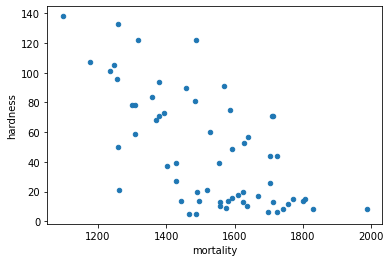

In [25]:
df.plot(kind='scatter', x='mortality', y='hardness')

In [26]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [27]:
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [28]:
X = df[['mortality']]
y = df['hardness']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([-0.12670202])

In [31]:
model.intercept_

239.3678426140957

In [32]:
y_pred = model.predict(X_test)

In [33]:
model.score(X_test, y_test)

0.4948982822876836

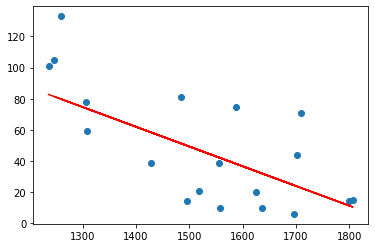

In [34]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [35]:
X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           7.83e-06
Time:                        14:03:28   Log-Likelihood:                -201.74
No. Observations:                  42   AIC:                             407.5
Df Residuals:                      40   BIC:                             411.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.3678     37.934      6.310      0.0

Text(0, 0.5, 'OLS Model Residuals')

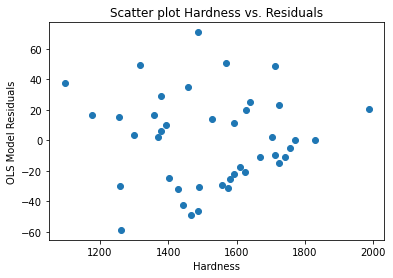

In [40]:
plt.scatter(X_const.iloc[:, 1], results.resid)
plt.title('Scatter plot Hardness vs. Residuals')
plt.xlabel('Hardness')
plt.ylabel('OLS Model Residuals')

Text(0, 0.5, 'Counts')

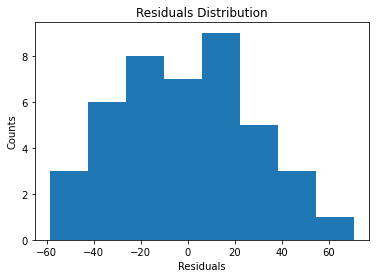

In [41]:
plt.hist(results.resid, bins = 8)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Counts')
# Остатки обычно распределяются без каких-либо специфических паттернов

2 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [42]:
df.location.value_counts()

North    35
South    26
Name: location, dtype: int64

In [43]:
df_South = df.loc[df['location'] == 'South']
df_North = df.loc[df['location'] == 'North']

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

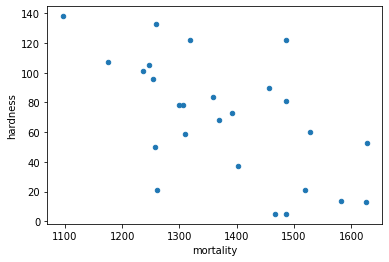

In [44]:
df_South.plot(kind='scatter', x='mortality', y='hardness')

Text(0.5, 1.08, 'Scatter plot and distribution matrix')

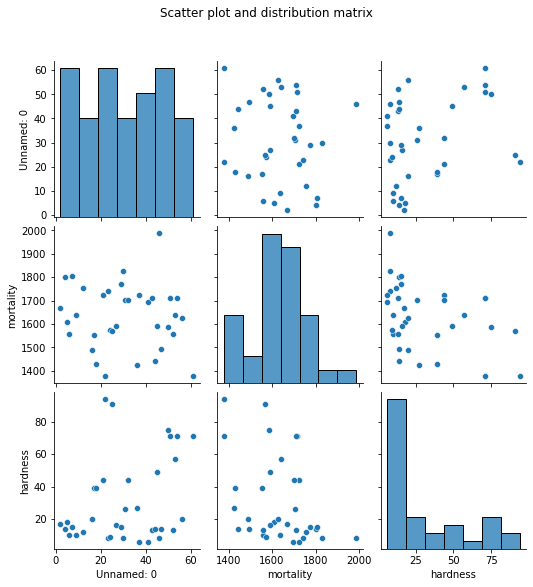

In [45]:
sns.pairplot(df_North).fig.suptitle('Scatter plot and distribution matrix', y = 1.08)

In [90]:
df_South[['mortality', 'hardness']].corr(method='spearman')


,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [91]:
df_South[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [46]:
X = df_South[['mortality']]
y = df_South['hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
model.coef_


array([-0.18112812])

In [107]:
model.intercept_

324.11907462359864

In [108]:
y_pred = model.predict(X_test)

In [109]:
model.score(X_test, y_test)

-0.05226615794483824

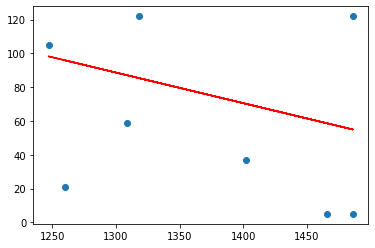

In [110]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [48]:
X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           7.30e-05
Time:                        14:15:24   Log-Likelihood:                -80.286
No. Observations:                  18   AIC:                             164.6
Df Residuals:                      16   BIC:                             166.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        324.1191     47.493      6.825      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0, 0.5, 'OLS Model Residuals')

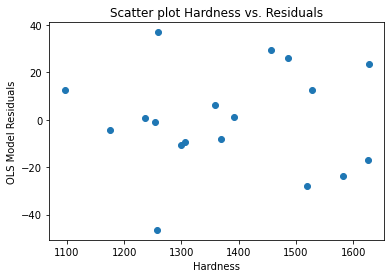

In [50]:
plt.scatter(X_const.iloc[:, 1], results.resid)
plt.title('Scatter plot Hardness vs. Residuals')
plt.xlabel('Hardness')
plt.ylabel('OLS Model Residuals')

Text(0, 0.5, 'Counts')

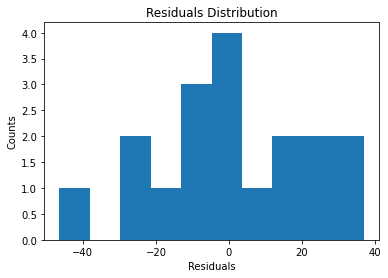

In [52]:
plt.hist(results.resid, bins = 10)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Counts')
#Большее количество точек сосредоточено при малых значениях твердости, не распределенных нормально.

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

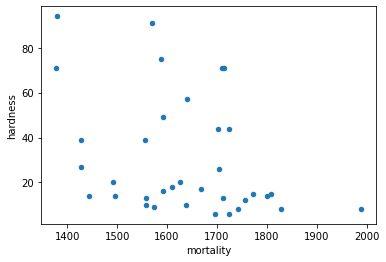

In [120]:
df_North.plot(kind='scatter', x='mortality', y='hardness')

Text(0.5, 1.08, 'Scatter plot and distribution matrix')

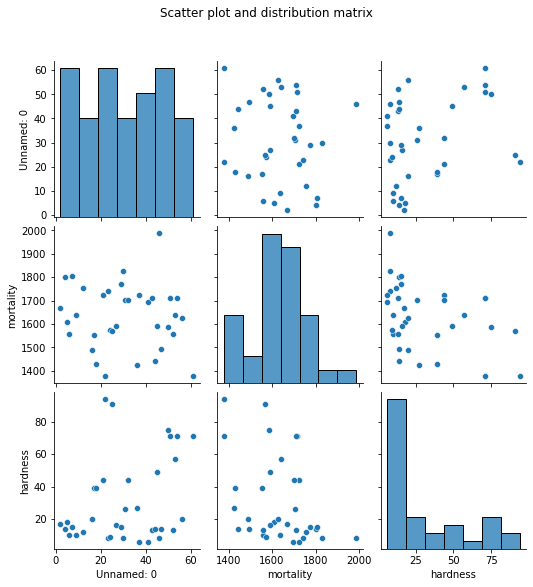

In [54]:
sns.pairplot(df_North).fig.suptitle('Scatter plot and distribution matrix', y = 1.08)

In [121]:
df_North[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [122]:
df_North[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [123]:
X = df_North[['mortality']]
y = df_North['hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [124]:
model.coef_


array([-0.09774218])

In [125]:
model.intercept_

191.72797679112006

In [126]:
y_pred = model.predict(X_test)

In [127]:
model.score(X_test, y_test)

-0.34863672627416675

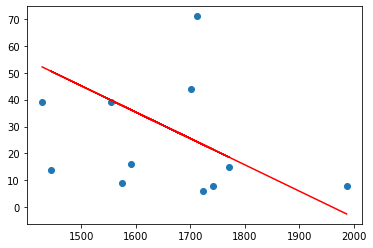

In [128]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [55]:
X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           7.30e-05
Time:                        14:19:28   Log-Likelihood:                -80.286
No. Observations:                  18   AIC:                             164.6
Df Residuals:                      16   BIC:                             166.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        324.1191     47.493      6.825      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0, 0.5, 'OLS Model Residuals')

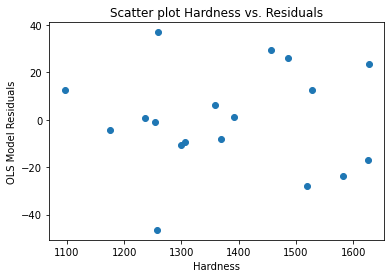

In [56]:
plt.scatter(X_const.iloc[:, 1], results.resid)
plt.title('Scatter plot Hardness vs. Residuals')
plt.xlabel('Hardness')
plt.ylabel('OLS Model Residuals')

Text(0, 0.5, 'Counts')

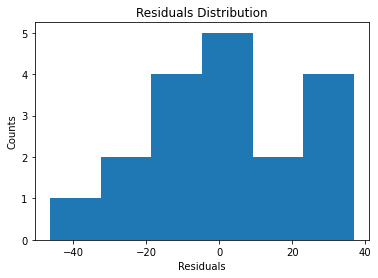

In [57]:
plt.hist(results.resid, bins = 6)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Counts')
#Остатки без особых закономерностей, нормально распределенные.